p1

In [41]:
import cv2
import matplotlib.pyplot as plt

In [42]:
!wget https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcRxS6PrqT4w0hv3kOUyQ78uTb2yAFedT4krcHzkuNXVHf7__xpmSvfkyUf55F8Fbv9r5yhR0DkoasAIExpVTK4rsQ

--2025-08-26 06:01:39--  https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcRxS6PrqT4w0hv3kOUyQ78uTb2yAFedT4krcHzkuNXVHf7__xpmSvfkyUf55F8Fbv9r5yhR0DkoasAIExpVTK4rsQ
Resolving encrypted-tbn3.gstatic.com (encrypted-tbn3.gstatic.com)... 74.125.202.102, 74.125.202.138, 74.125.202.113, ...
Connecting to encrypted-tbn3.gstatic.com (encrypted-tbn3.gstatic.com)|74.125.202.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32630 (32K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcRxS6PrqT4w0hv3kOUyQ78uTb2yAFedT4krcHzkuNXVHf7__xpmSvfkyUf55F8Fbv9r5yhR0DkoasAIExpVTK4rsQ.6’

images?q=tbn:ANd9Gc 100%[===================>]  31.87K  --.-KB/s    in 0s      

2025-08-26 06:01:39 (158 MB/s) - ‘images?q=tbn:ANd9GcRxS6PrqT4w0hv3kOUyQ78uTb2yAFedT4krcHzkuNXVHf7__xpmSvfkyUf55F8Fbv9r5yhR0DkoasAIExpVTK4rsQ.6’ saved [32630/32630]



In [43]:
img_color = cv2.imread('image.jpeg')
if img_color is None:
  raise FileNotFoundError("Image not found. Ensure the file path is correct.")
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

In [44]:
bit_planes=[(img_gray >> i) & 1 for i in range(8)]

In [45]:
def show(title, image, cmap='gray'):
  plt.imshow(image, cmap=cmap)
  plt.title(title)
  plt.axis('off')
  plt.show()

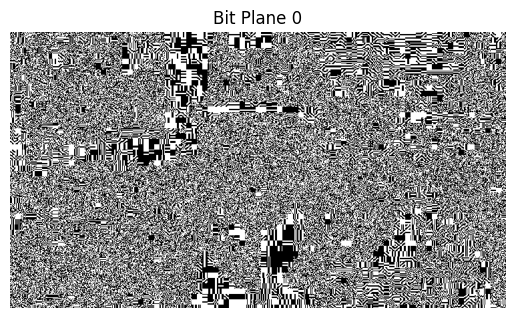

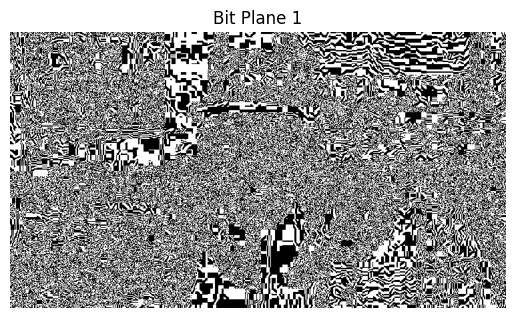

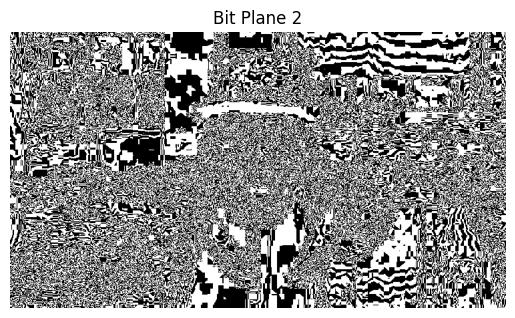

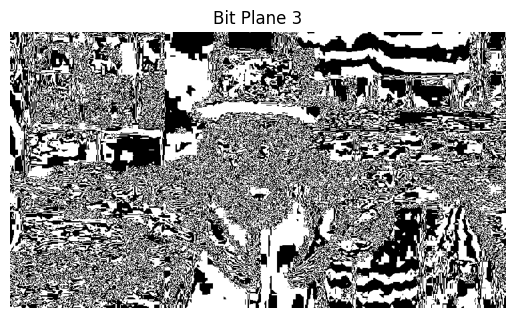

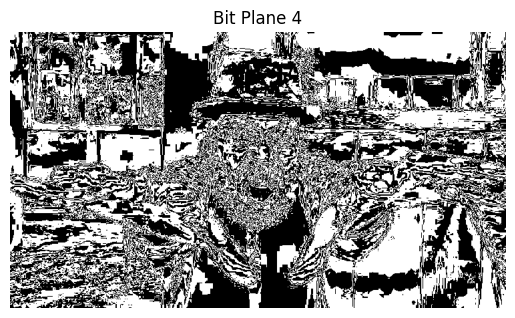

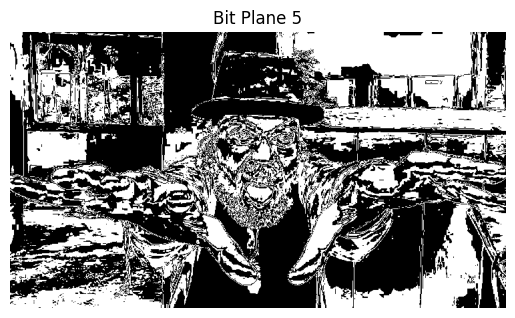

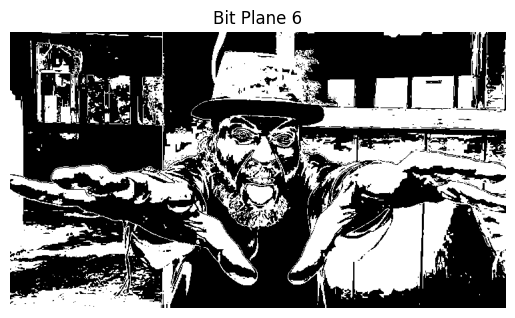

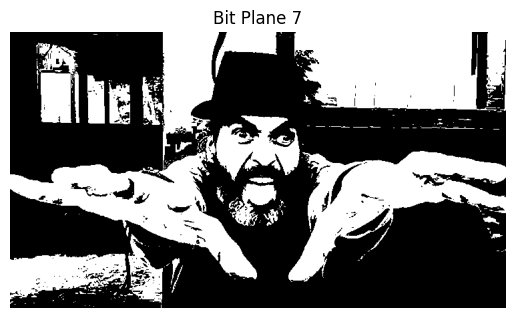

In [46]:
for i,plane in enumerate(bit_planes):
  show(f'Bit Plane {i}', plane*255)

p2

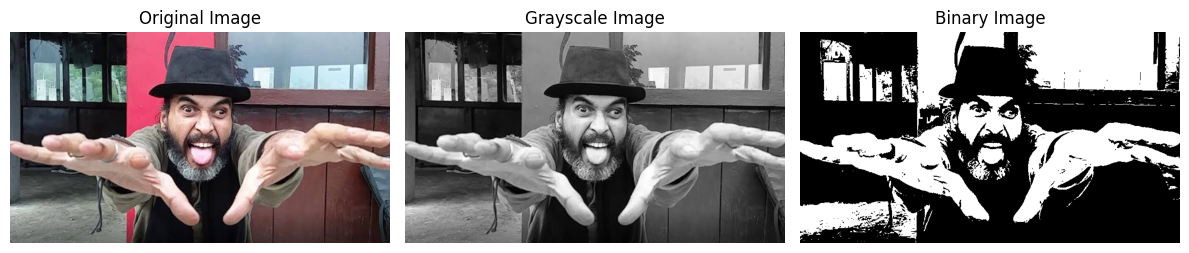

In [47]:
image = cv2.imread('image.jpeg')
if image is None:
  raise FileNotFoundError("Image not found. Ensure the file path is correct.")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 127,255,cv2.THRESH_BINARY)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(binary, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.tight_layout()
plt.show()

p3

In [48]:
img_color = cv2.imread('image.jpeg')
if img_color is None:
  raise FileNotFoundError("Image not found. Ensure the file path is correct.")
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

In [49]:
edges_canny = cv2.Canny(img_gray, 100,200)

sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)

In [50]:
def show(title, image, cmap='gray'):
  plt.imshow(image, cmap=cmap)
  plt.title(title)
  plt.axis('off')
  plt.show()

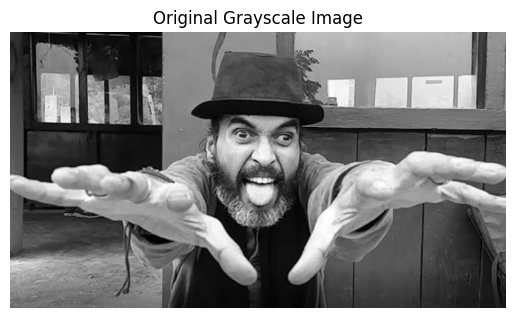

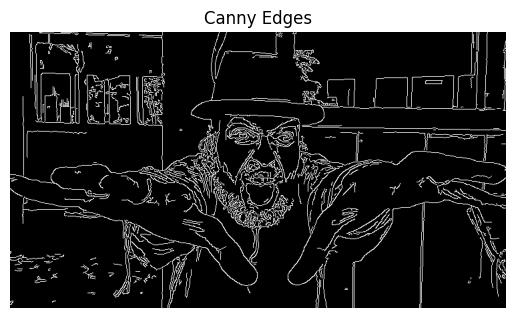

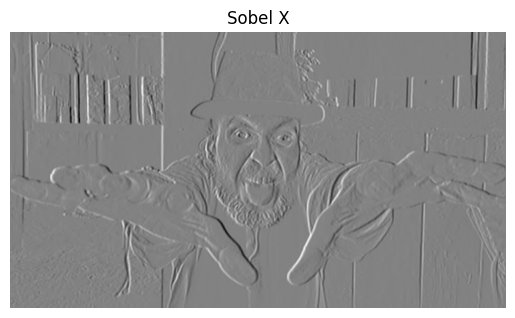

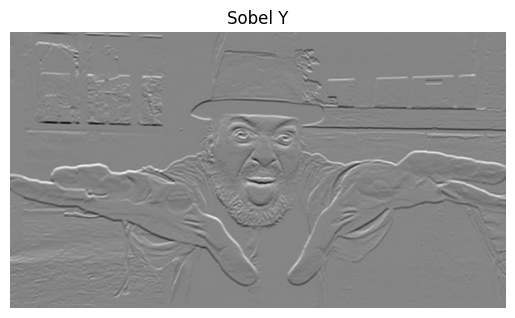

In [51]:
show("Original Grayscale Image", img_gray)
show("Canny Edges", edges_canny)
show("Sobel X", sobel_x)
show("Sobel Y", sobel_y)

p4

In [52]:
import numpy as np

In [53]:
img_color = cv2.imread('image.jpeg')
if img_color is None:
  raise FileNotFoundError("Image not found. Ensure the file path is correct.")
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

In [ ]:
f=np.fft.fft2(img_gray)

In [55]:
fshift=np.fft.fftshift(f)

In [56]:
magnitude_spectrum=20*np.log(np.abs(fshift))

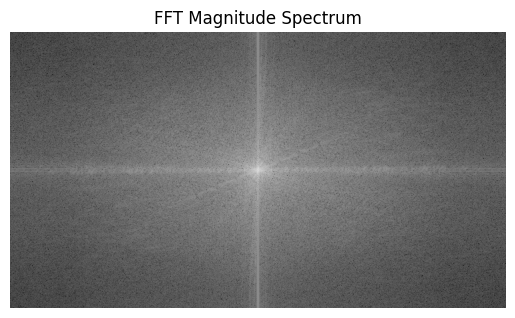

In [57]:
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('FFT Magnitude Spectrum')
plt.axis('off')
plt.show()

p5

In [58]:
img_color = cv2.imread('image.jpeg')
if img_color is None:
  raise FileNotFoundError("Image not found. Ensure the file path is correct.")
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
rows,cols=img_gray.shape

In [59]:
f = np.fft.fft2(img_gray)
fshift = np.fft.fftshift(f)

In [60]:
mask_lp = np.zeros((rows,cols),np.uint8)
crow,ccol = rows//2,cols//2
mask_lp[crow-30:crow+30, ccol-30:ccol+30] = 1

In [61]:
fshift_lp=fshift*mask_lp
img_lp=np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_lp)))

In [62]:
mask_hp=1-mask_lp
fshift_hp=fshift*mask_hp
img_hp=np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_hp)))

In [63]:
def show(title, image, cmap='gray'):
  plt.imshow(image, cmap=cmap)
  plt.title(title)
  plt.axis('off')
  plt.show()

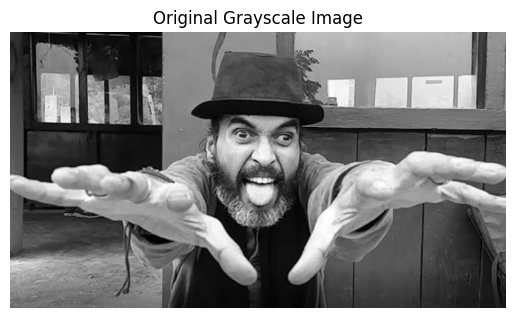

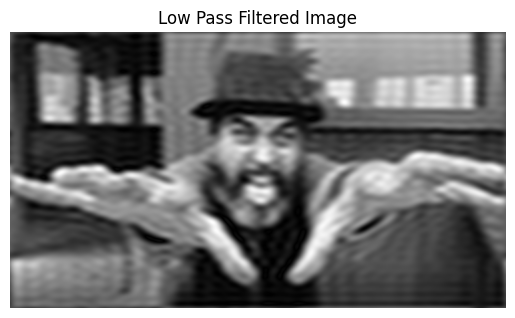

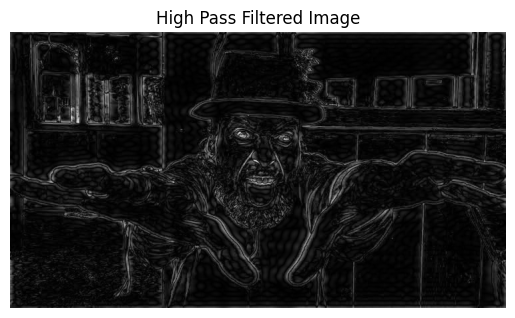

In [64]:
show("Original Grayscale Image", img_gray)
show("Low Pass Filtered Image", img_lp)
show("High Pass Filtered Image", img_hp)

p6

In [65]:
img_color=cv2.imread('image.jpeg')
if img_color is None:
  raise FileNotFoundError("Image not found. Ensure the file path is correct.")
img_gray=cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

/tmp/ipython-input-2110984205.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_gray.ravel(),256,[0,256])


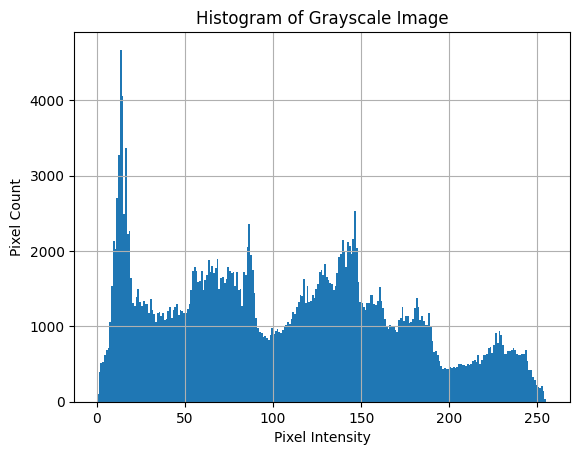

In [66]:
plt.hist(img_gray.ravel(),256,[0,256])
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Pixel Count')
plt.grid(True)
plt.show()